In [67]:
import pickle
import os
import matplotlib.pyplot as plt
# Find all peaks using scipy's find_peaks
from scipy.signal import find_peaks
import numpy as np

# Load the data
filename_0_125_delta_height = "freefall_delta_height_0_125_yoshida_fourth_order_20250518_03-28.pkl"
filename_0_125_delta_strength = "freefall_delta_strength_0_125_yoshida_fourth_order_20250518_06-45.pkl"
filename_0_125_gauss_height = "freefall_gaussian_height_0_125_1028_yoshida_fourth_order_20250518_08-47.pkl"
filename_0_125_gauss_strength = "freefall_gaussian_strength_0_125_1028_yoshida_fourth_order_20250518_12-02.pkl"

# drop height variation
j_d_height = pickle.load(open(os.path.join('./results/data', filename_0_125_delta_height), 'rb'))
j_d_strength = pickle.load(open(os.path.join('./results/data', filename_0_125_delta_strength), 'rb'))
j_g_height = pickle.load(open(os.path.join('./results/data', filename_0_125_gauss_height), 'rb'))
j_g_strength = pickle.load(open(os.path.join('./results/data', filename_0_125_gauss_strength), 'rb'))

In [9]:
t_vals = np.linspace(0, 0.001 * 50000, 50000)
dt = t_vals[1] - t_vals[0]

In [10]:
def find_first_peak(array, peak=0, threshold=0.0000001):
	"""
	Find the first significant peak in an array.
	
	Parameters:
	-----------
	array : numpy.ndarray
		The input array to analyze
	threshold : float, optional
		Minimum height difference to consider a point as a peak (default: 0.1)
		
	Returns:
	--------
	tuple
		(peak_index, peak_value) or (None, None) if no peak is found
	"""
	
	
	# Find peaks with minimum height difference
	# peaks, properties = find_peaks(array, prominence=0.1 * np.max(array))
	peaks, properties = find_peaks(array, height=np.max(array)*0.0001)
	
	if len(peaks) >= peak+1:
		# Get peak
		first_peak_idx = peaks[peak]
		first_peak_val = array[first_peak_idx]
		return first_peak_idx, first_peak_val
	else:
		return None, None


## Delta - Drop Height

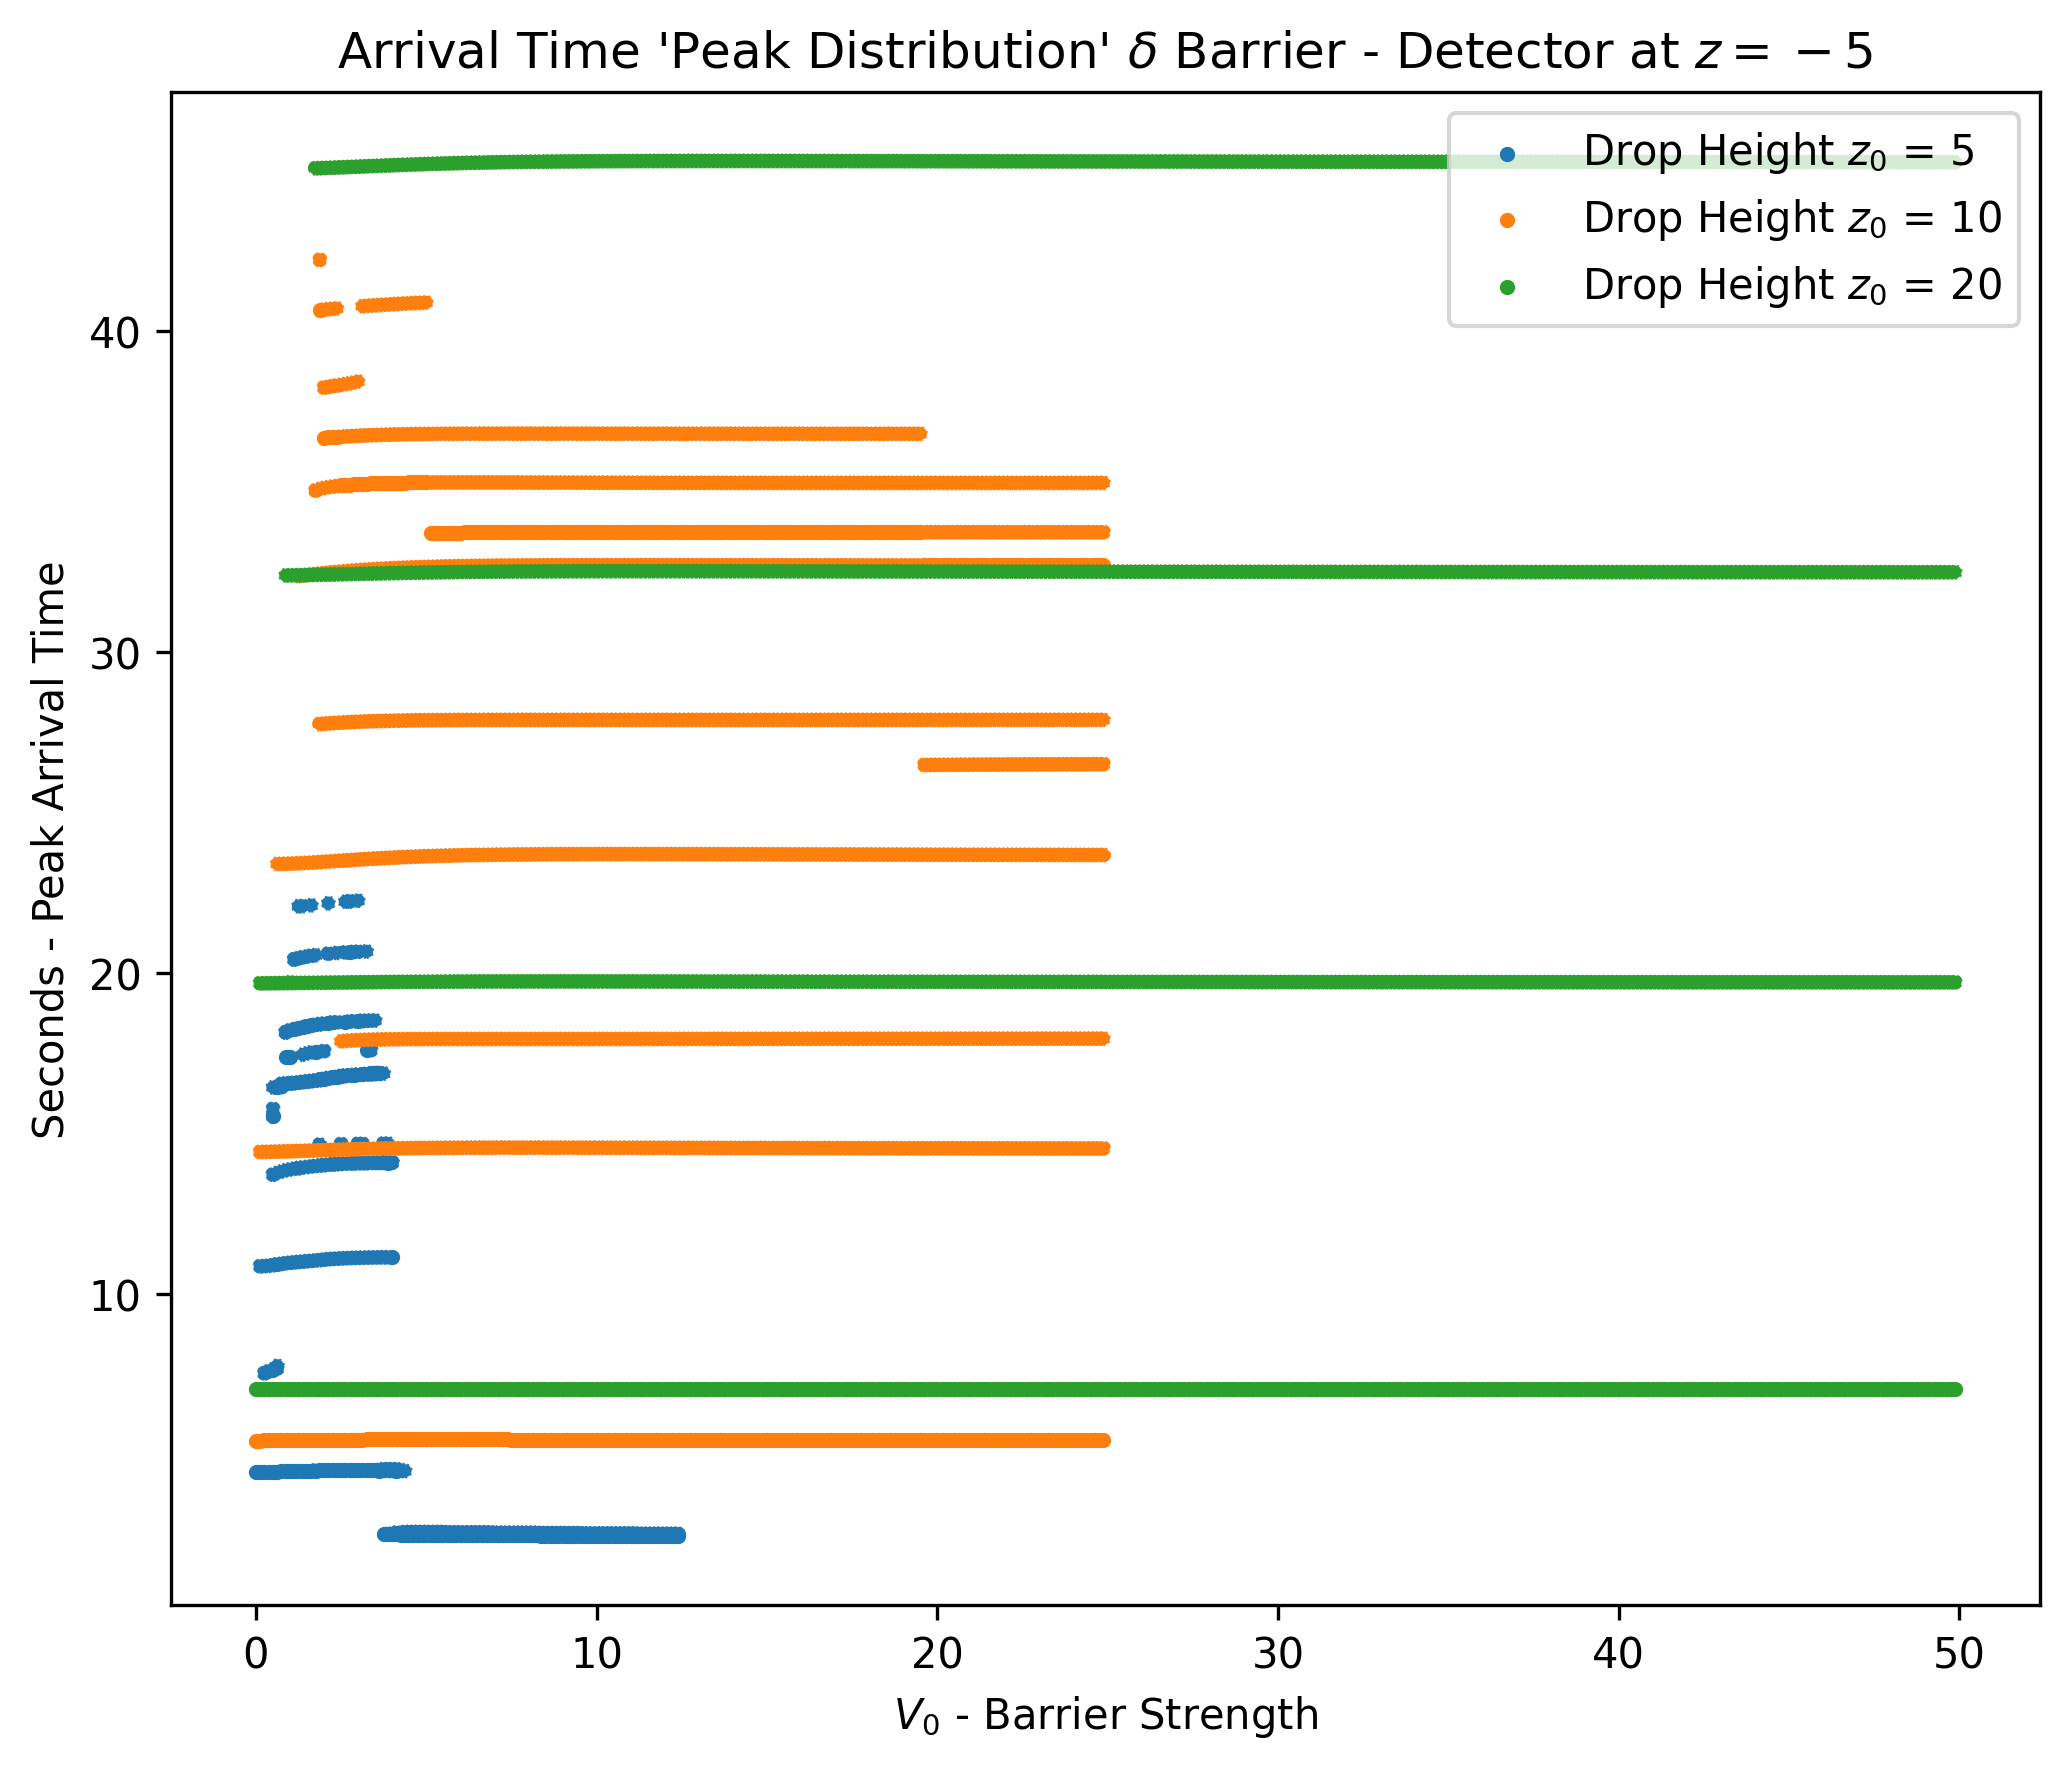

In [84]:
peaks = 10
j_results_donna = j_d_height

# Dictionary to store peak time values for all 7 peaks
peak_time_values = {i: {} for i in range(1, peaks)}  # 1 through 7 peaks

# go through each z0 result
for z0, j_for_v0_values in j_results_donna.items():
	# Initialize lists for each peak
	for peak_num in range(1, peaks):
		peak_time_values[peak_num][z0] = []

	# go through all j values for this slice
	for ii, j in enumerate(j_for_v0_values):
		# Find all 7 peaks
		for peak_num in range(1, peaks):
			peak_idx, peak_val = find_first_peak(j, peak_num - 1)  # peak_num - 1 because find_first_peak uses 0-based indexing
			
			if peak_idx is not None:
				peak_time_values[peak_num][z0].append([ii*0.125, peak_idx*dt])

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(7, 6))  # Slightly larger figure to accommodate more lines
fig.dpi = 300

# Get the default color cycle
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Define line styles for different peaks
line_styles = ['-', '--', ':', '-.', '--', ':', '-.']  # Different styles for each peak

# Plot each z0 value
for i, (z0, _) in enumerate(peak_time_values[1].items()):
	color = colors[i % len(colors)]  # Cycle through colors for different z0 values
	
	# Plot all X peaks for this z0
	for peak_num in range(1, peaks):
		
		label = f"Drop Height $z_0$ = {z0}" if peak_num == 1 else None

		if len(peak_time_values[peak_num][z0]) > 0:
			x, y = zip(*peak_time_values[peak_num][z0])
			ax.scatter(
				x, y,
				color=color,
				linestyle=line_styles[(peak_num - 1) % (len(line_styles)-1)],
				linewidths=0.5,
				s=10,  # <-- This makes the dots small. Try values like 5, 10, or 20.
				label=label
			)

ax.set_title("Arrival Time 'Peak Distribution' $\delta$ Barrier - Detector at $z=-5$")
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside to prevent overlap
ax.legend(loc='upper right')  # Move legend outside to prevent overlap
ax.set_xlabel("$V_0$ - Barrier Strength")
ax.set_ylabel("Seconds - Peak Arrival Time")
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

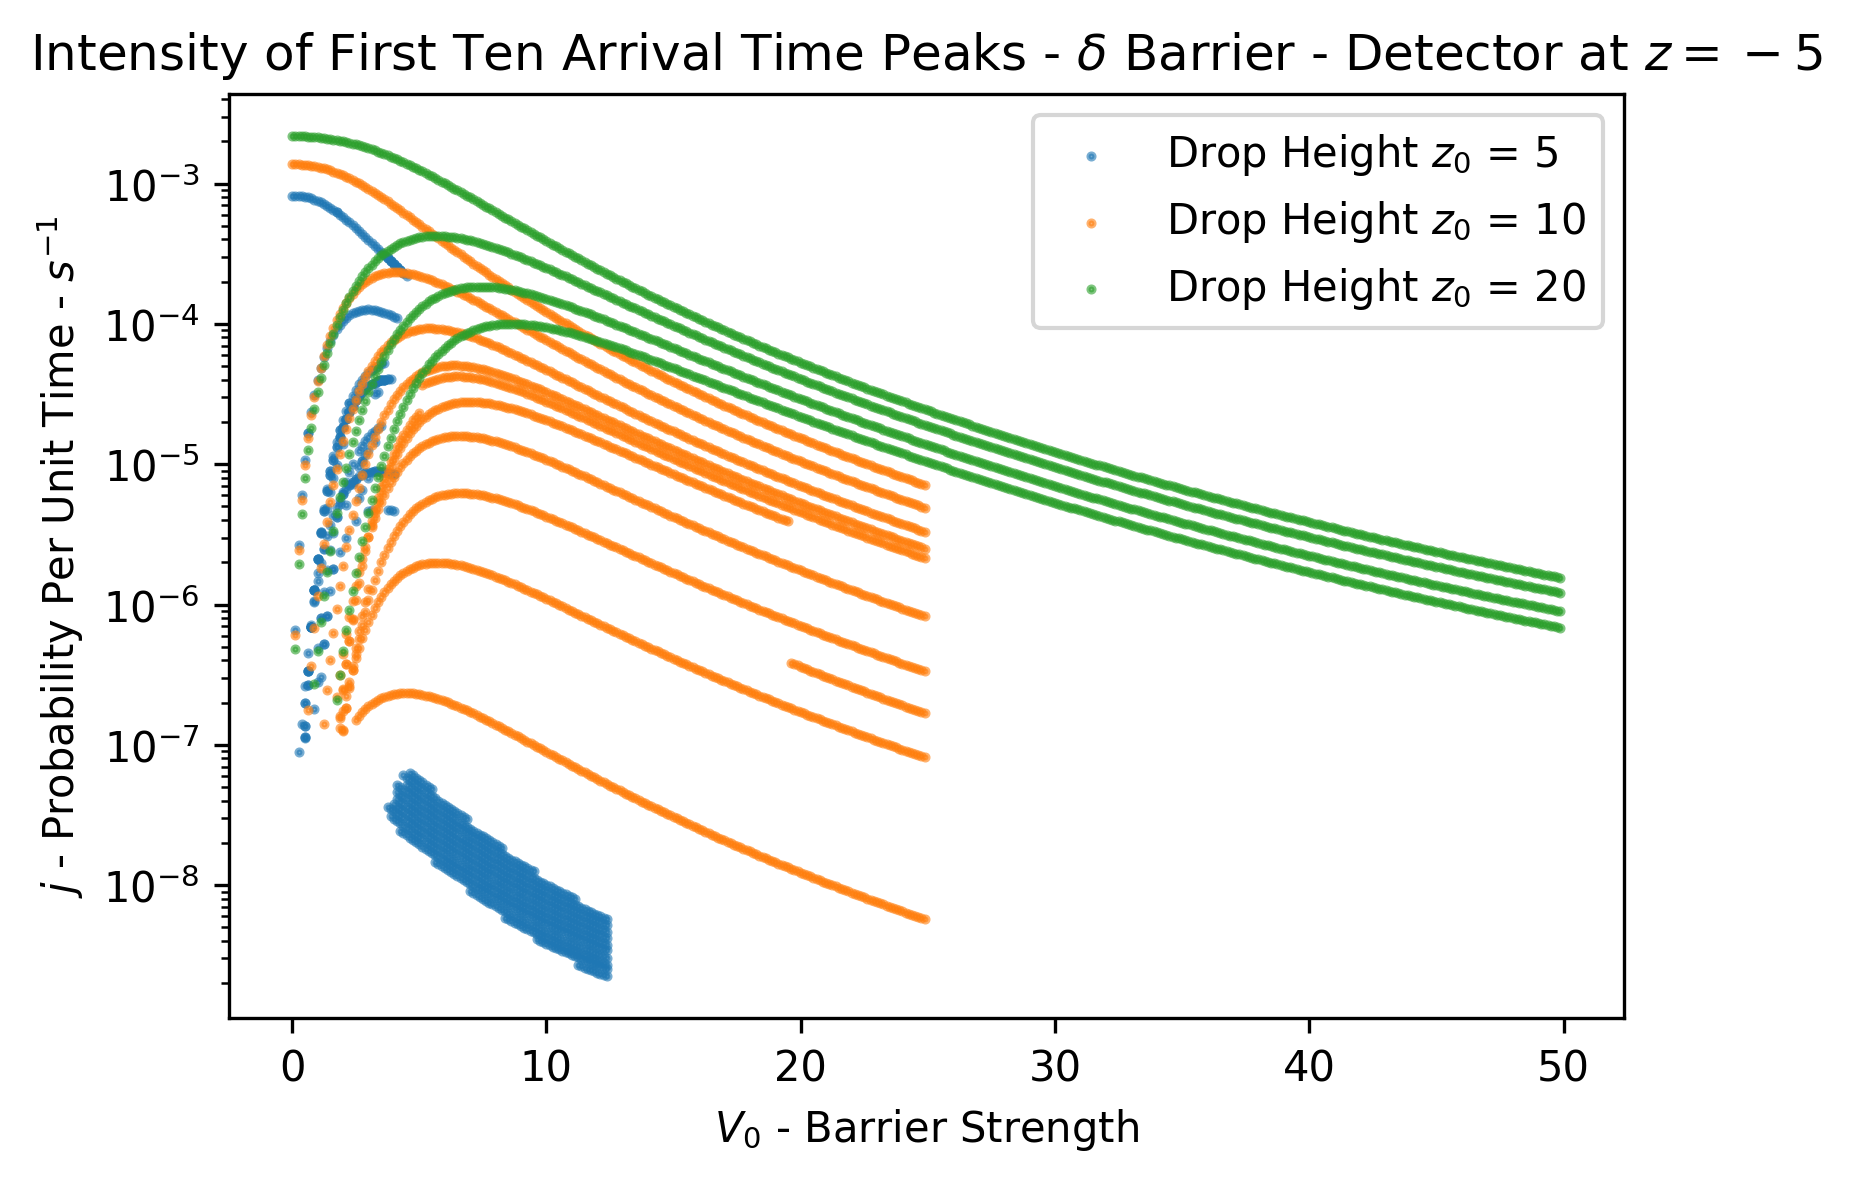

In [87]:
num_peaks = 10
peak_values = [{} for _ in range(num_peaks)]
j_results_donna = j_d_height

# Collect peak values for each z0 and each peak
for z0, j_for_v0_values in j_results_donna.items():
	for peak_dict in peak_values:
		peak_dict[z0] = []

	for ii, j in enumerate(j_for_v0_values):
		for peak_num in range(num_peaks):
			peak_idx, peak_val = find_first_peak(j, peak_num)
			peak_values[peak_num][z0].append([ii * 0.125, peak_val])

fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, z0 in enumerate(j_results_donna.keys()):
	
	# if z0 == 20:
	#     continue
	
	color = colors[i % len(colors)]
	for peak_num in range(num_peaks):
		x, y = zip(*peak_values[peak_num][z0])
		# Only label the first and second peaks
		label = None
		if peak_num == 0:
			label = f"Drop Height $z_0$ = {z0}"
		ax.scatter(x, y, color=color, s=2, label=label, alpha=0.6)

ax.set_title("Intensity of First Ten Arrival Time Peaks - $\delta$ Barrier - Detector at $z=-5$")
ax.legend()
ax.set_xlabel("$V_0$ - Barrier Strength")
ax.set_ylabel("$j$ - Probability Per Unit Time - $s^{-1}$")
ax.set_yscale('log')
# ax.set_xlim(0, 15)
plt.show()

## Delta - Barrier Strength

In [45]:
j_d_strength[29.875][0].shape

(50000,)

In [57]:
# We have to reshape j_d_strength, because I've stored in incorrectly ...
v_list = [5, 10, 15, 20]
j_d_new = {5: [], 10: [], 15: [], 20: []}

for z0 in j_d_strength:
	for i, j in enumerate(j_d_strength[z0]):
		j_d_new[v_list[i]].append(j)

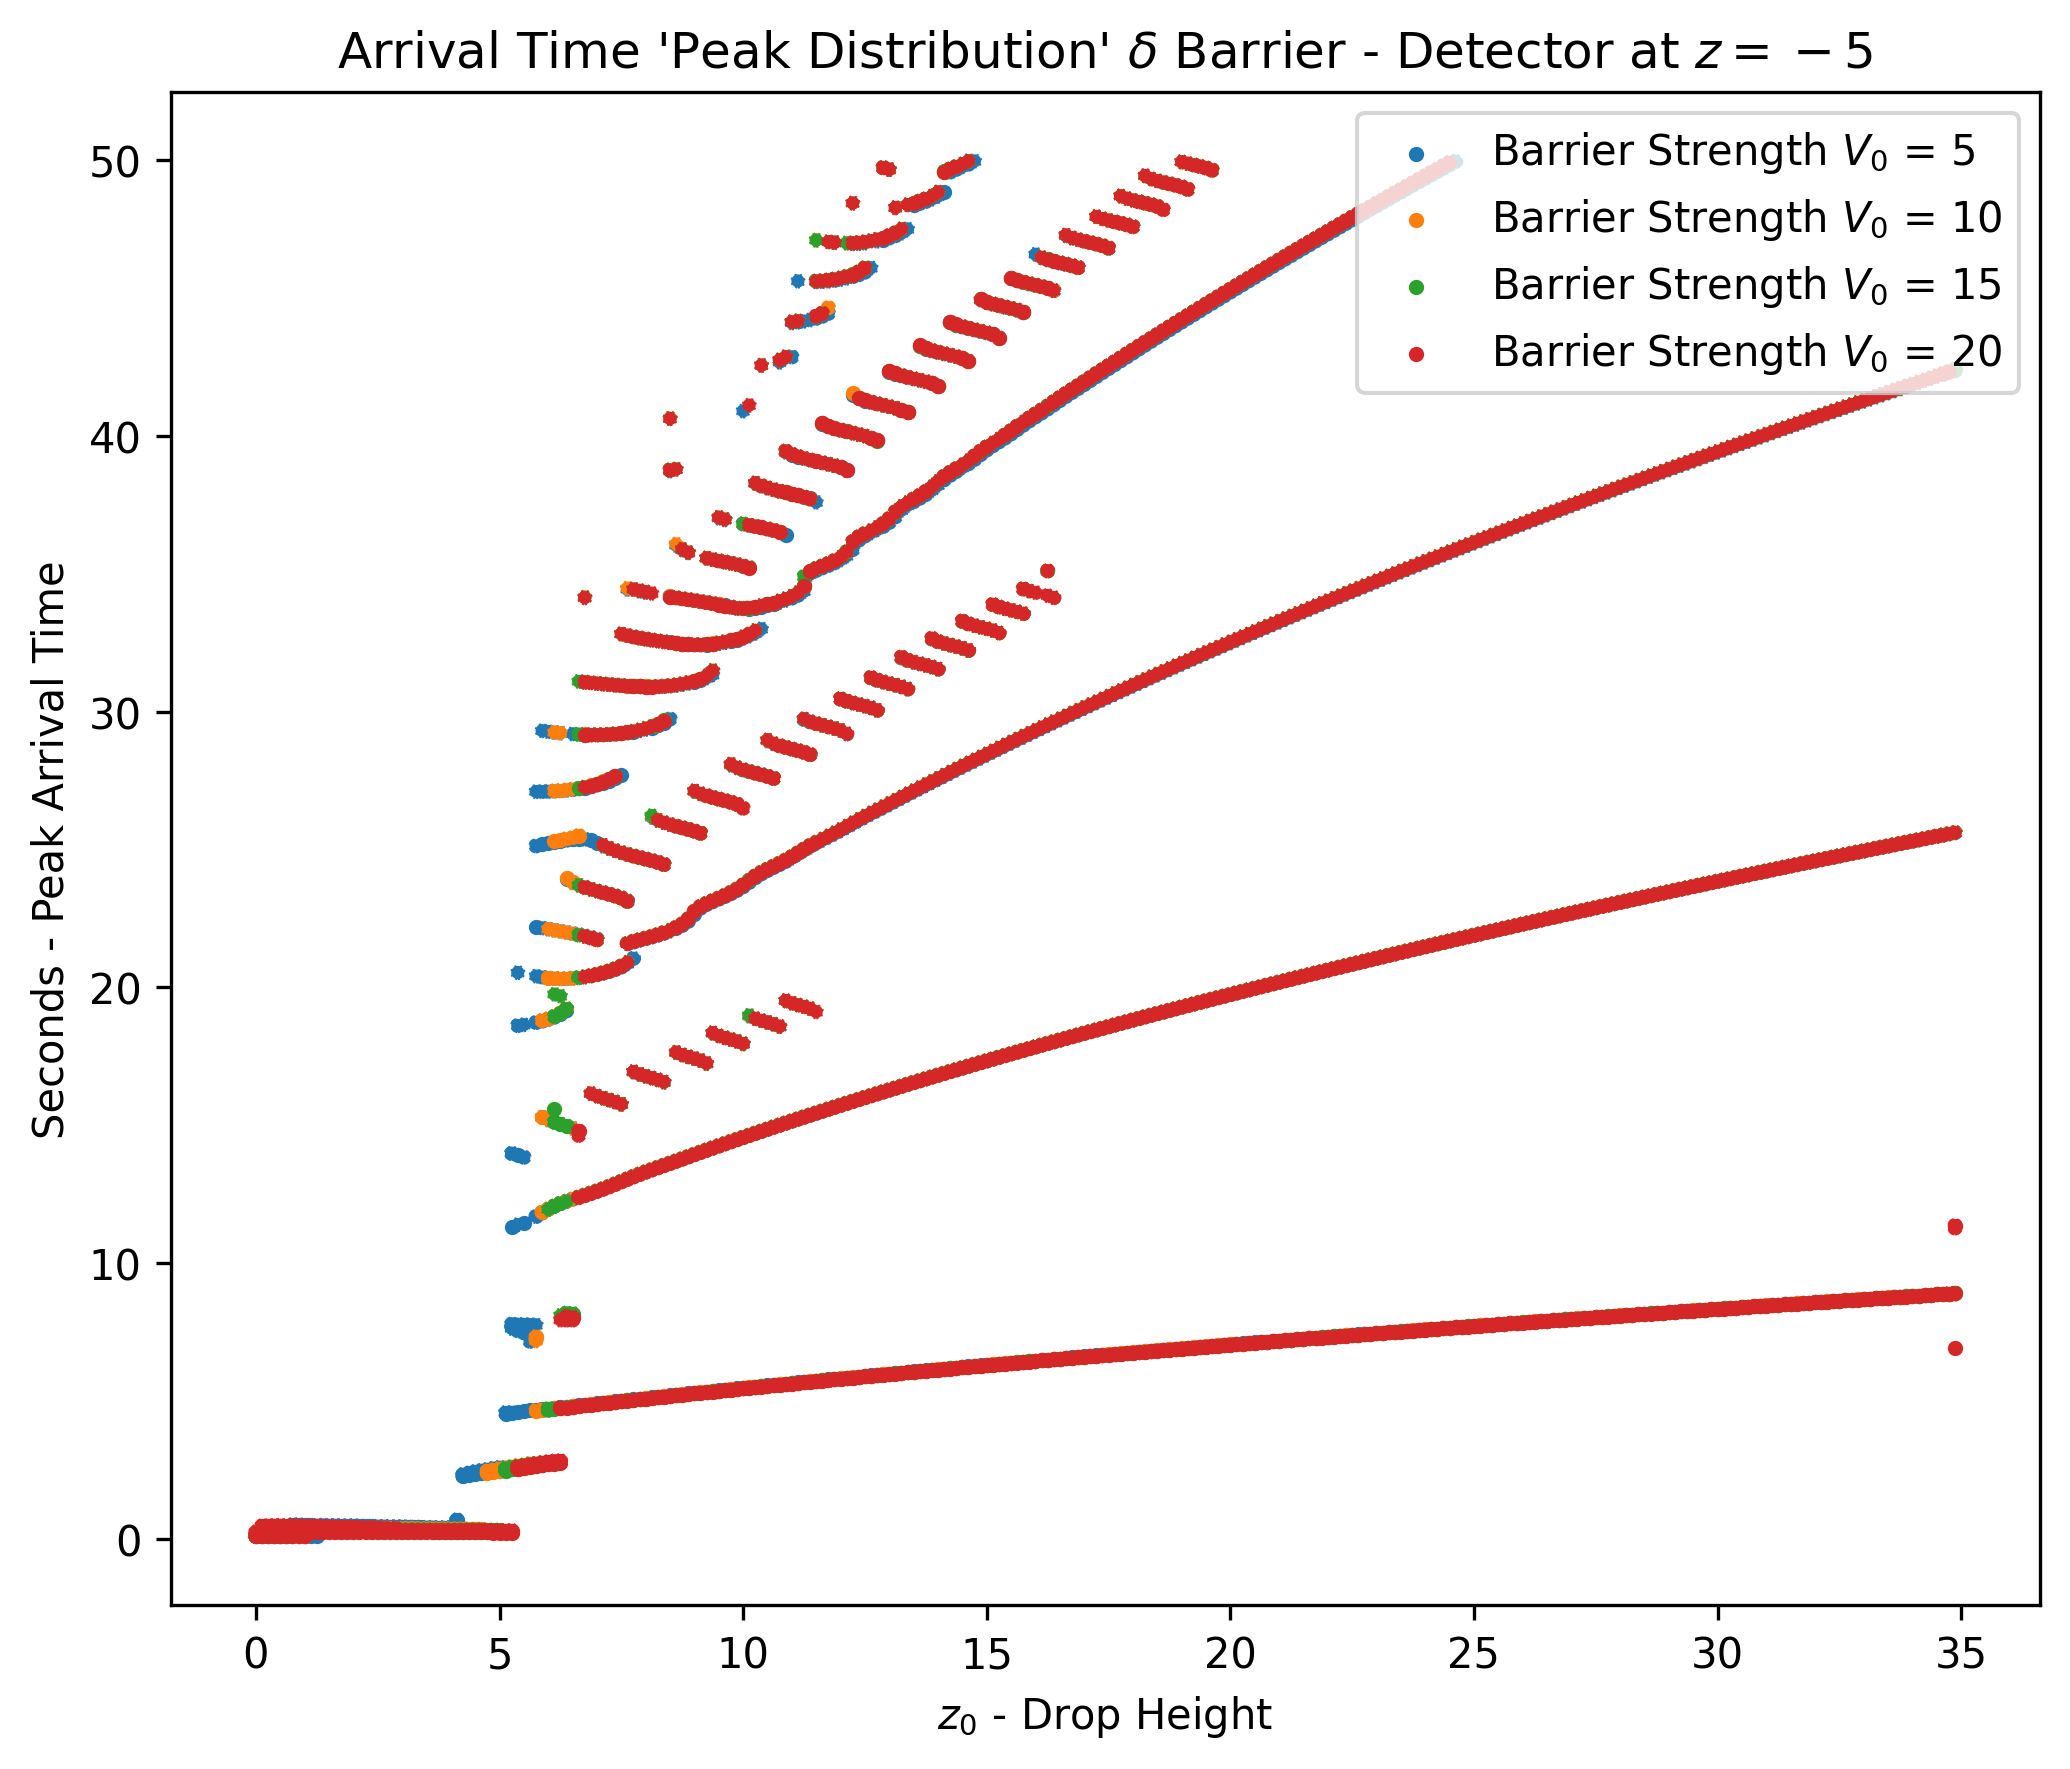

In [89]:
peaks = 10
j_results_donna = j_d_new

# Dictionary to store peak time values for all 7 peaks
peak_time_values = {i: {} for i in range(1, peaks)}  # 1 through 7 peaks

# go through each z0 result
for v0, j_for_v0_values in j_results_donna.items():
	# Initialize lists for each peak
	for peak_num in range(1, peaks):
		peak_time_values[peak_num][v0] = []

	# go through all j values for this slice
	for ii, j in enumerate(j_for_v0_values):
		# Find all 7 peaks
		for peak_num in range(1, peaks):
			peak_idx, peak_val = find_first_peak(j, peak_num - 1)  # peak_num - 1 because find_first_peak uses 0-based indexing
			
			if peak_idx is not None:
				peak_time_values[peak_num][v0].append([ii*0.125, peak_idx*dt])

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(7, 6))  # Slightly larger figure to accommodate more lines
fig.dpi = 300

# Get the default color cycle
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Define line styles for different peaks
line_styles = ['-', '--', ':', '-.', '--', ':', '-.']  # Different styles for each peak

# Plot each z0 value
for i, (v0, _) in enumerate(peak_time_values[1].items()):
	color = colors[i % len(colors)]  # Cycle through colors for different z0 values
	
	# Plot all X peaks for this z0
	for peak_num in range(1, peaks):
		
		label = f"Barrier Strength $V_0$ = {v0}" if peak_num == 1 else None

		if len(peak_time_values[peak_num][v0]) > 0:
			x, y = zip(*peak_time_values[peak_num][v0])
			ax.scatter(
				x, y,
				color=color,
				linestyle=line_styles[(peak_num - 1) % (len(line_styles)-1)],
				linewidths=0.5,
				s=10,  # <-- This makes the dots small. Try values like 5, 10, or 20.
				label=label
			)

ax.set_title("Arrival Time 'Peak Distribution' $\delta$ Barrier - Detector at $z=-5$")
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside to prevent overlap
ax.legend(loc='upper right')  # Move legend outside to prevent overlap
ax.set_xlabel("$z_0$ - Drop Height")
ax.set_ylabel("Seconds - Peak Arrival Time")
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

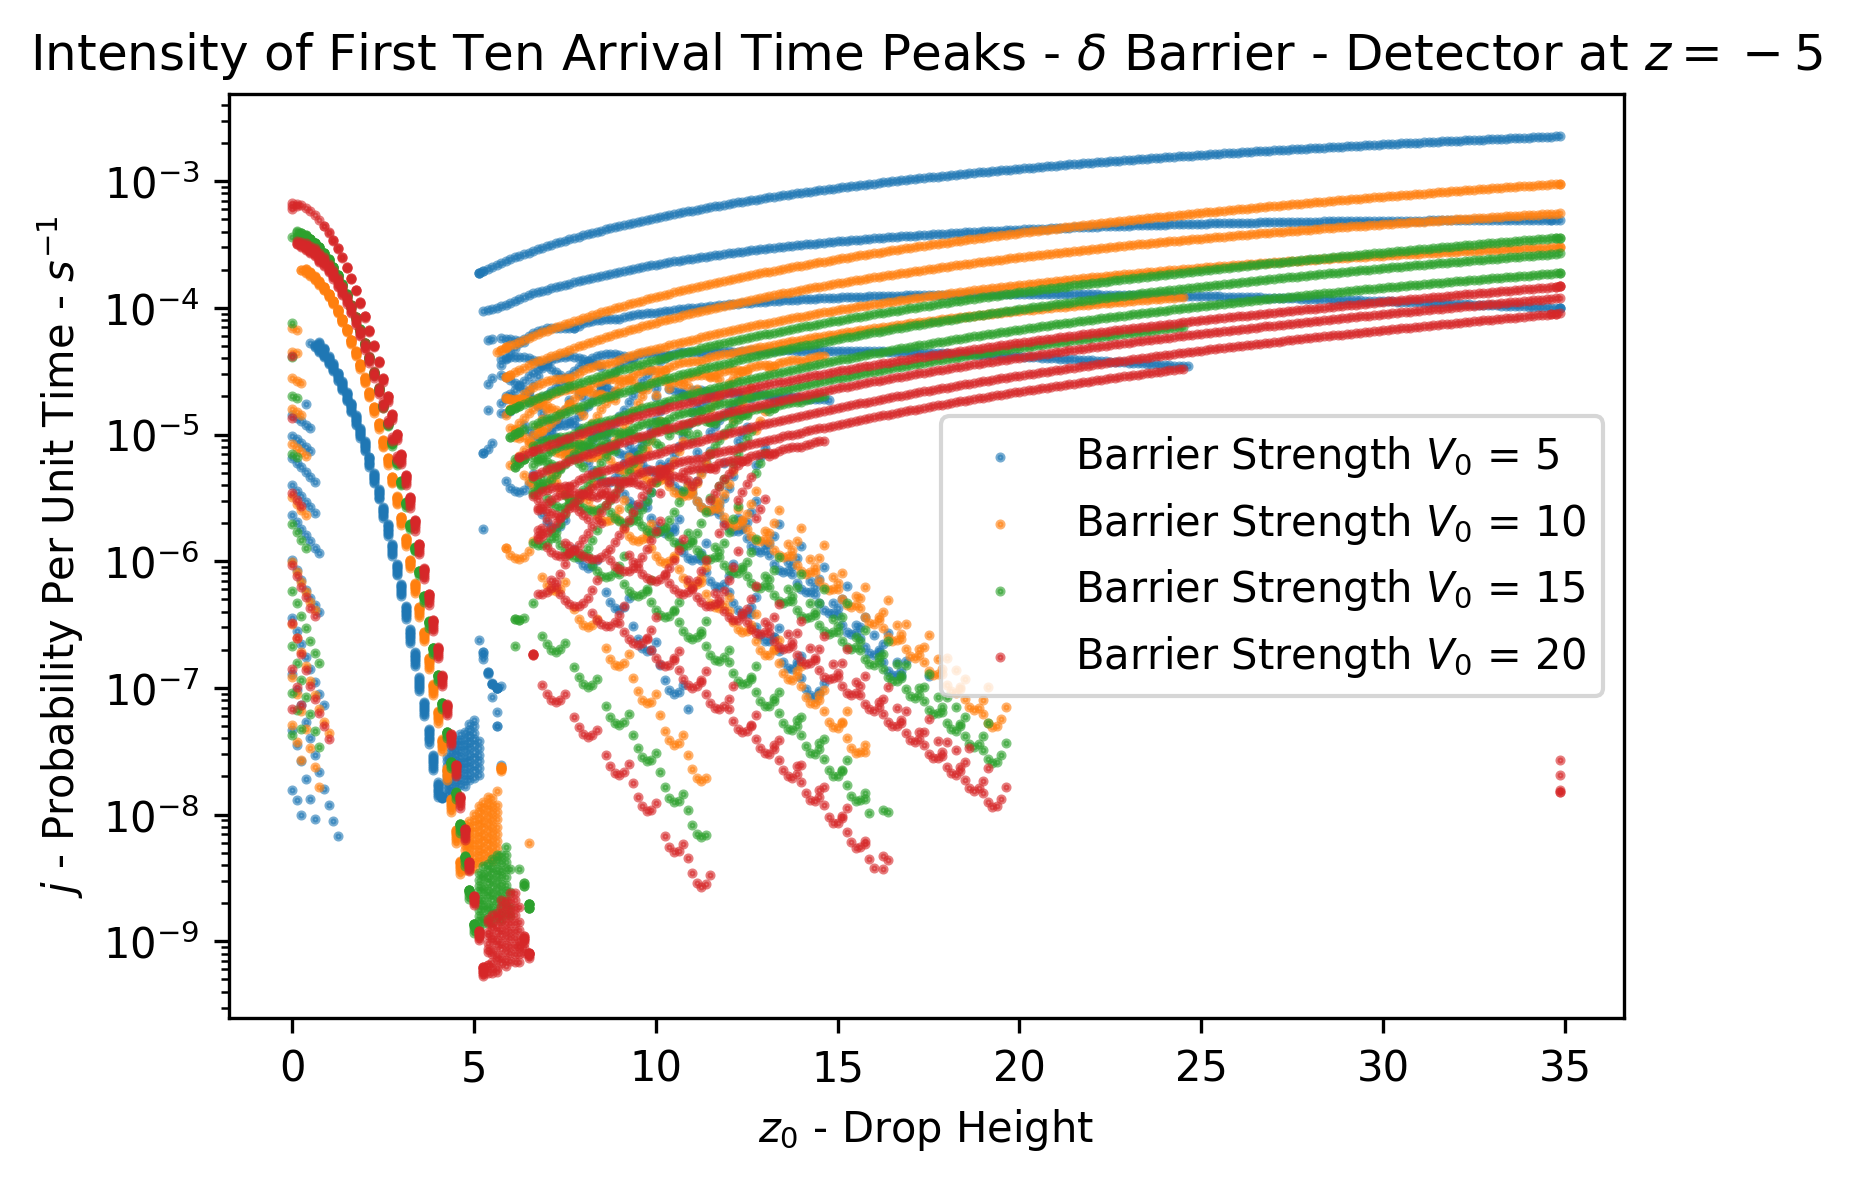

In [90]:
num_peaks = 10
peak_values = [{} for _ in range(num_peaks)]
j_results_donna = j_d_new

# Collect peak values for each z0 and each peak
for z0, j_for_v0_values in j_results_donna.items():
	for peak_dict in peak_values:
		peak_dict[z0] = []

	for ii, j in enumerate(j_for_v0_values):
		for peak_num in range(num_peaks):
			peak_idx, peak_val = find_first_peak(j, peak_num)
			peak_values[peak_num][z0].append([ii * 0.125, peak_val])

fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, z0 in enumerate(j_results_donna.keys()):
	
	# if z0 == 20:
	#     continue
	
	color = colors[i % len(colors)]
	for peak_num in range(num_peaks):
		x, y = zip(*peak_values[peak_num][z0])
		# Only label the first and second peaks
		label = None
		if peak_num == 0:
			label = f"Barrier Strength $V_0$ = {z0}"
		ax.scatter(x, y, color=color, s=2, label=label, alpha=0.6)

ax.set_title("Intensity of First Ten Arrival Time Peaks - $\delta$ Barrier - Detector at $z=-5$")
ax.legend()
ax.set_xlabel("$z_0$ - Drop Height")
ax.set_ylabel("$j$ - Probability Per Unit Time - $s^{-1}$")
ax.set_yscale('log')
# ax.set_xlim(0, 15)
plt.show()

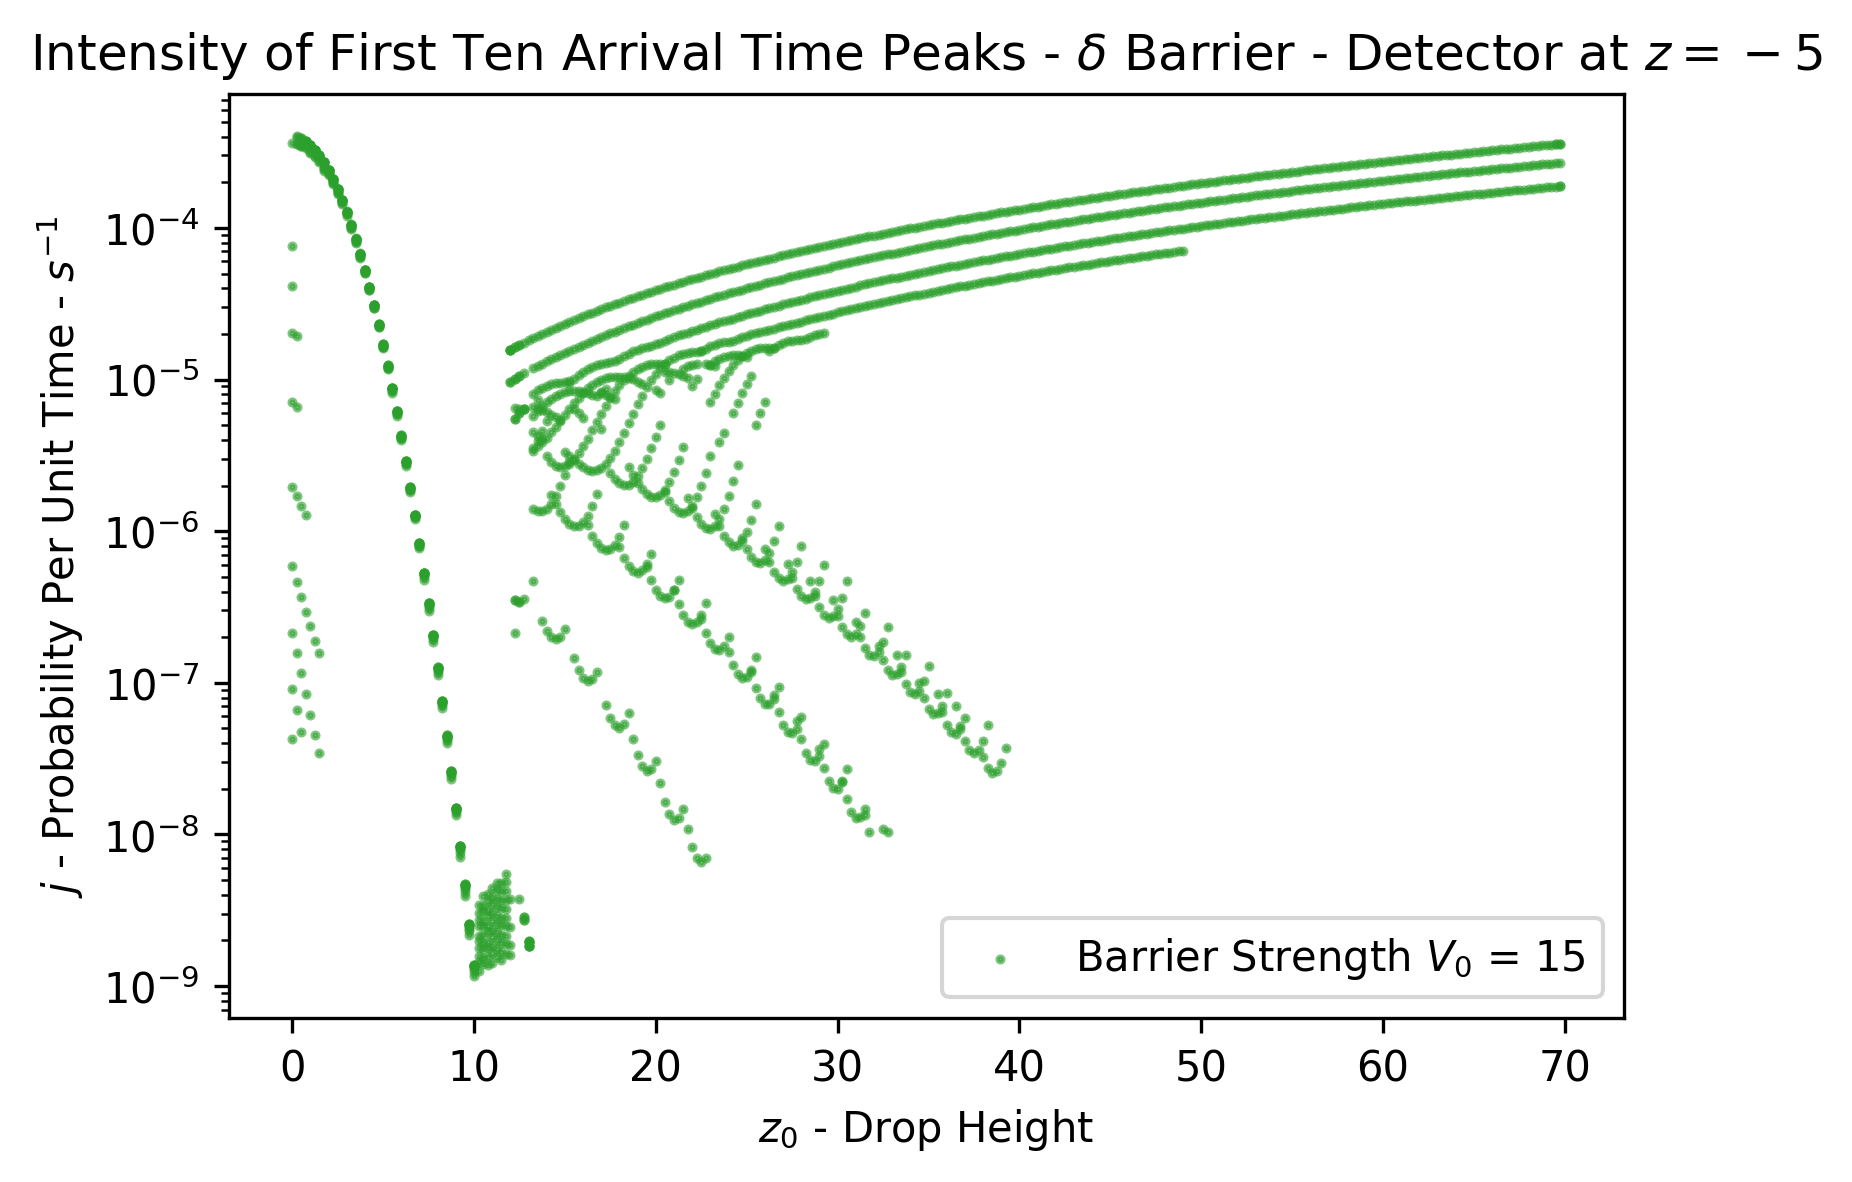

In [91]:
num_peaks = 10
peak_values = [{} for _ in range(num_peaks)]
j_results_donna = j_d_new

# Collect peak values for each z0 and each peak
for z0, j_for_v0_values in j_results_donna.items():
	for peak_dict in peak_values:
		peak_dict[z0] = []

	for ii, j in enumerate(j_for_v0_values):
		for peak_num in range(num_peaks):
			peak_idx, peak_val = find_first_peak(j, peak_num)
			peak_values[peak_num][z0].append([ii * 0.25, peak_val])

fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, z0 in enumerate(j_results_donna.keys()):
	
	if z0 != 15:
		continue
	
	color = colors[i % len(colors)]
	for peak_num in range(num_peaks):
		x, y = zip(*peak_values[peak_num][z0])
		# Only label the first and second peaks
		label = None
		if peak_num == 0:
			label = f"Barrier Strength $V_0$ = {z0}"
		ax.scatter(x, y, color=color, s=2, label=label, alpha=0.6)

ax.set_title("Intensity of First Ten Arrival Time Peaks - $\delta$ Barrier - Detector at $z=-5$")
ax.legend()
ax.set_xlabel("$z_0$ - Drop Height")
ax.set_ylabel("$j$ - Probability Per Unit Time - $s^{-1}$")
ax.set_yscale('log')
# ax.set_xlim(0, 15)
plt.show()

## Gaussian - Drop Height - 1028 Grid Size Experiments

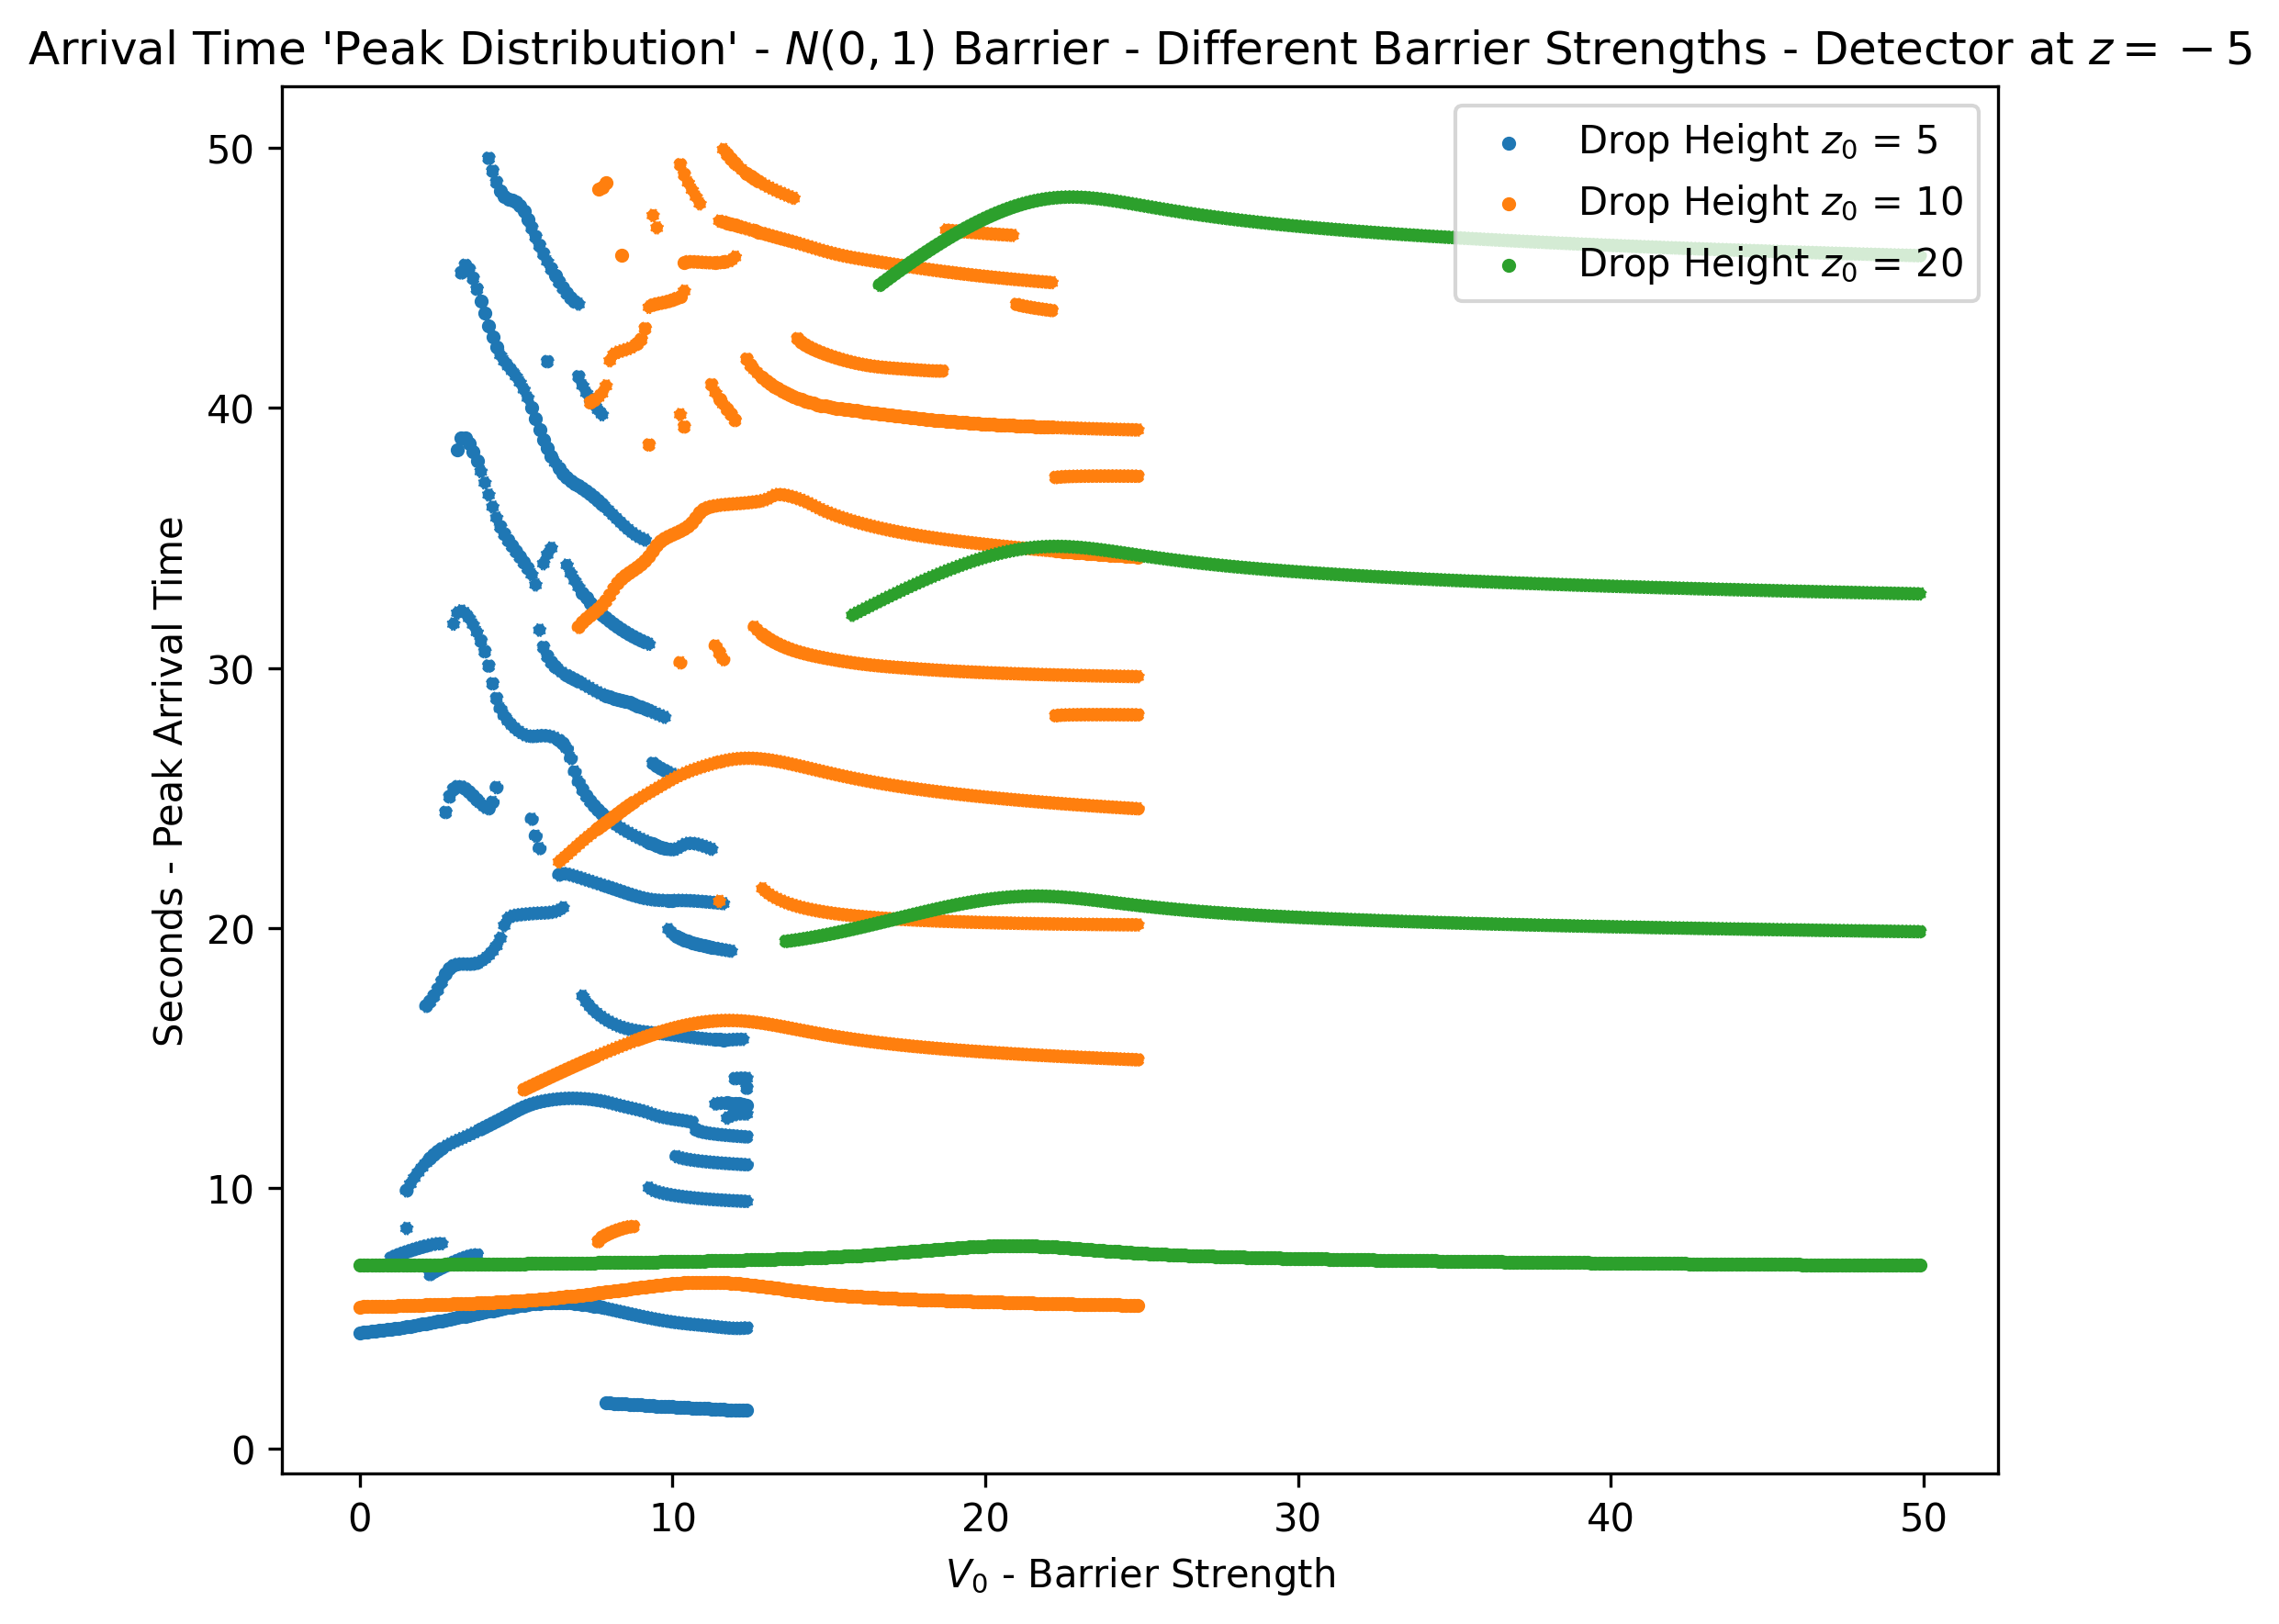

In [92]:
peaks = 10
j_results_donna = j_g_height

# Dictionary to store peak time values for all 7 peaks
peak_time_values = {i: {} for i in range(1, peaks)}  # 1 through 7 peaks

# go through each z0 result
for z0, j_for_v0_values in j_results_donna.items():
	# Initialize lists for each peak
	for peak_num in range(1, peaks):
		peak_time_values[peak_num][z0] = []

	# go through all j values for this slice
	for ii, j in enumerate(j_for_v0_values):
		# Find all 7 peaks
		for peak_num in range(1, peaks):
			peak_idx, peak_val = find_first_peak(j, peak_num - 1)  # peak_num - 1 because find_first_peak uses 0-based indexing
			
			if peak_idx is not None:
				peak_time_values[peak_num][z0].append([ii*0.125, peak_idx*dt])

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(7, 6))  # Slightly larger figure to accommodate more lines
fig.dpi = 300

# Get the default color cycle
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Define line styles for different peaks
line_styles = ['-', '--', ':', '-.', '--', ':', '-.']  # Different styles for each peak

# Plot each z0 value
for i, (z0, _) in enumerate(peak_time_values[1].items()):
	color = colors[i % len(colors)]  # Cycle through colors for different z0 values
	
	# Plot all X peaks for this z0
	for peak_num in range(1, peaks):
		
		label = f"Drop Height $z_0$ = {z0}" if peak_num == 1 else None

		if len(peak_time_values[peak_num][z0]) > 0:
			x, y = zip(*peak_time_values[peak_num][z0])
			ax.scatter(
				x, y,
				color=color,
				linestyle=line_styles[(peak_num - 1) % (len(line_styles)-1)],
				linewidths=0.5,
				s=10,  # <-- This makes the dots small. Try values like 5, 10, or 20.
				label=label
			)

ax.set_title("Arrival Time 'Peak Distribution' - $N(0,1)$ Barrier - Different Barrier Strengths - Detector at $z=-5$")
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside to prevent overlap
ax.legend(loc='upper right')  # Move legend outside to prevent overlap
ax.set_xlabel("$V_0$ - Barrier Strength")
ax.set_ylabel("Seconds - Peak Arrival Time")
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

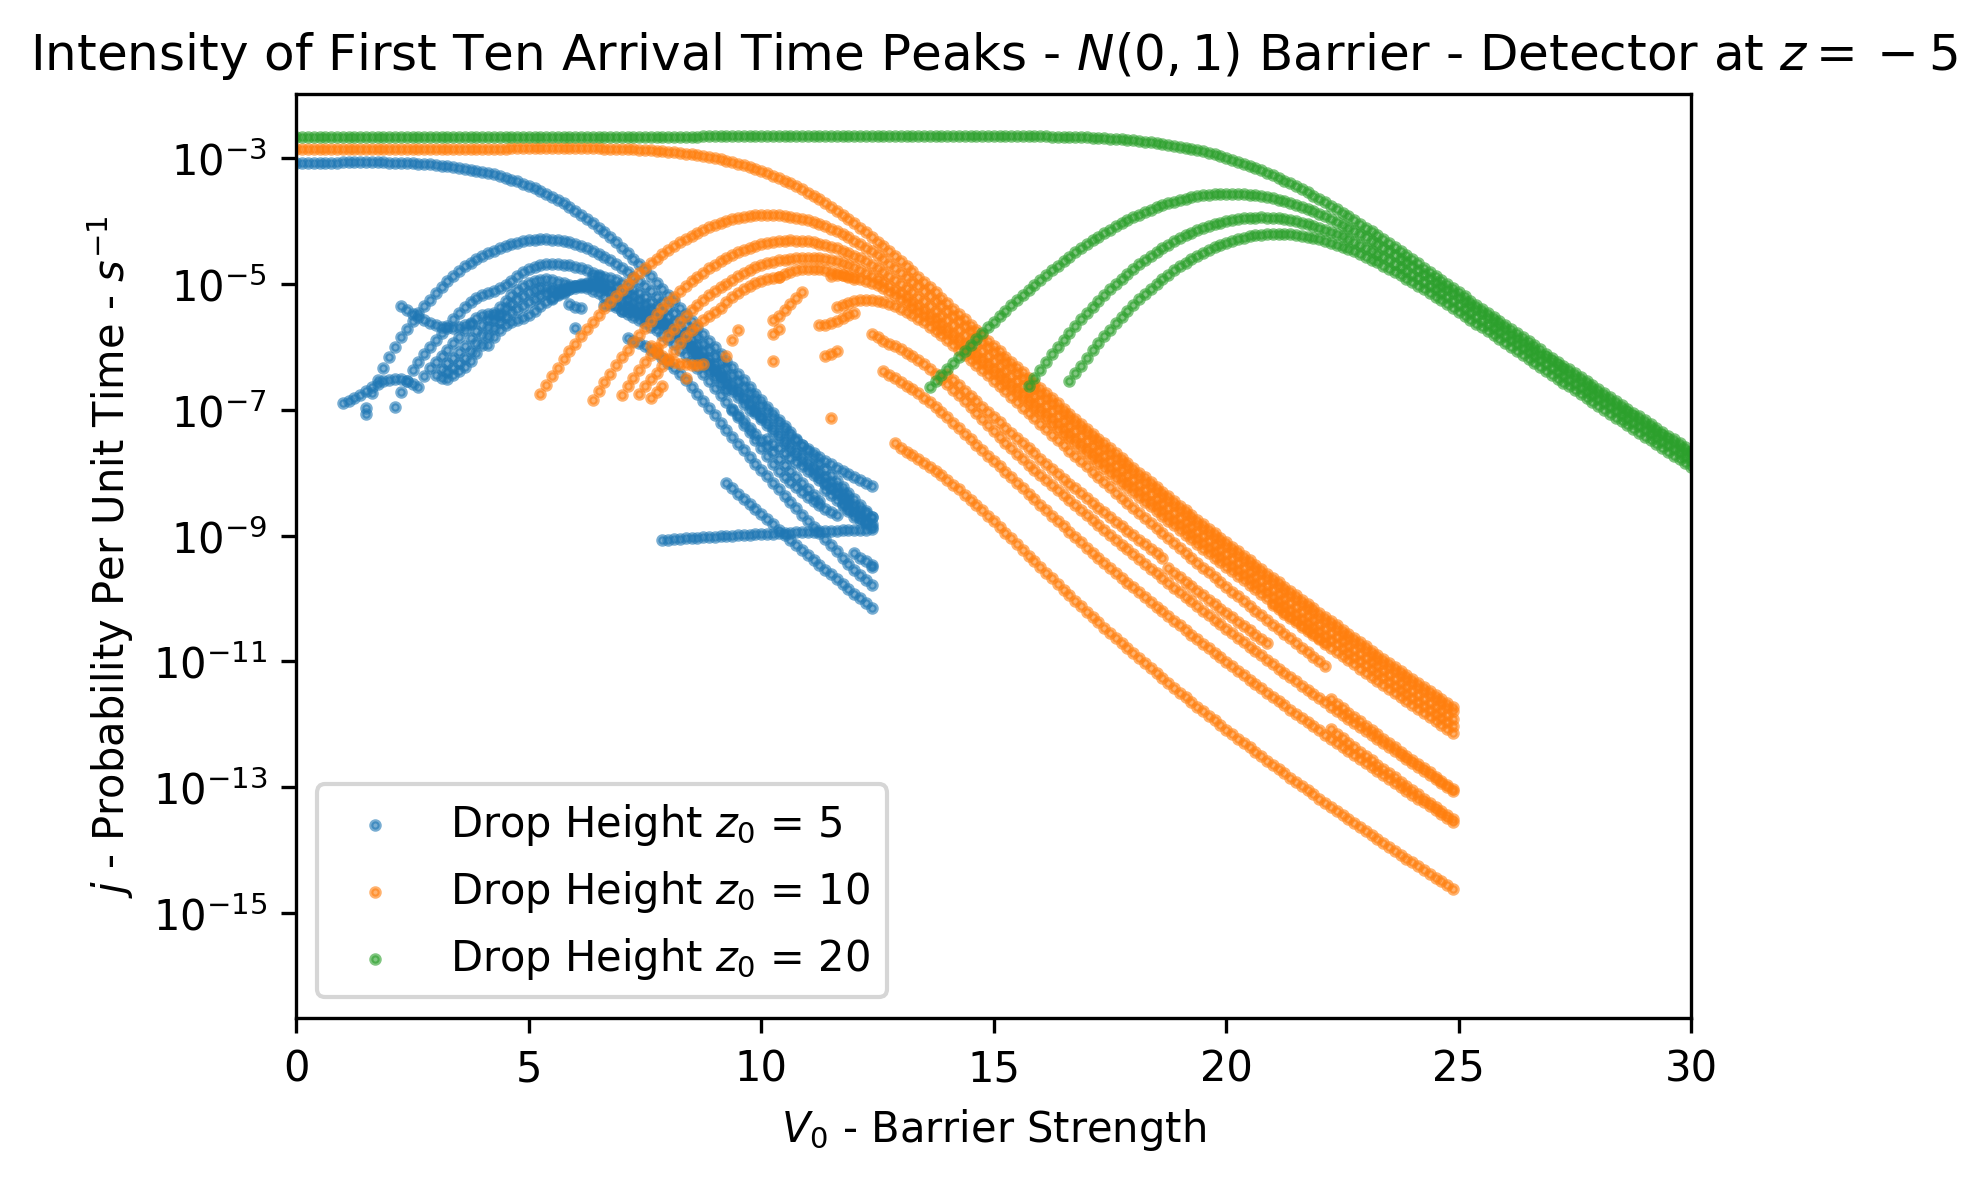

In [93]:
num_peaks = 10
peak_values = [{} for _ in range(num_peaks)]
j_results_donna = j_g_height

# Collect peak values for each z0 and each peak
for z0, j_for_v0_values in j_results_donna.items():
	for peak_dict in peak_values:
		peak_dict[z0] = []

	for ii, j in enumerate(j_for_v0_values):
		for peak_num in range(num_peaks):
			peak_idx, peak_val = find_first_peak(j, peak_num)
			peak_values[peak_num][z0].append([ii * 0.125, peak_val])

fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, z0 in enumerate(j_results_donna.keys()):
	
	# if z0 == 20:
	#     continue
	
	color = colors[i % len(colors)]
	for peak_num in range(num_peaks):
		x, y = zip(*peak_values[peak_num][z0])
		# Only label the first and second peaks
		label = None
		if peak_num == 0:
			label = f"Drop Height $z_0$ = {z0}"
		ax.scatter(x, y, color=color, s=4, label=label, alpha=0.6)

ax.set_title("Intensity of First Ten Arrival Time Peaks - $N(0,1)$ Barrier - Detector at $z=-5$")
ax.legend()
ax.set_xlabel("$V_0$ - Barrier Strength")
ax.set_ylabel("$j$ - Probability Per Unit Time - $s^{-1}$")
ax.set_yscale('log')
ax.set_xlim(0, 30)
plt.show()

## Gaussian - Strength - 1028 Grid Size

In [94]:
# We have to reshape j_d_strength, because I've stored in incorrectly ...
v_list = [5, 10, 15, 20]
j_g_new = {5: [], 10: [], 15: [], 20: []}

for z0 in j_g_strength:
	for i, j in enumerate(j_g_strength[z0]):
		j_g_new[v_list[i]].append(j)

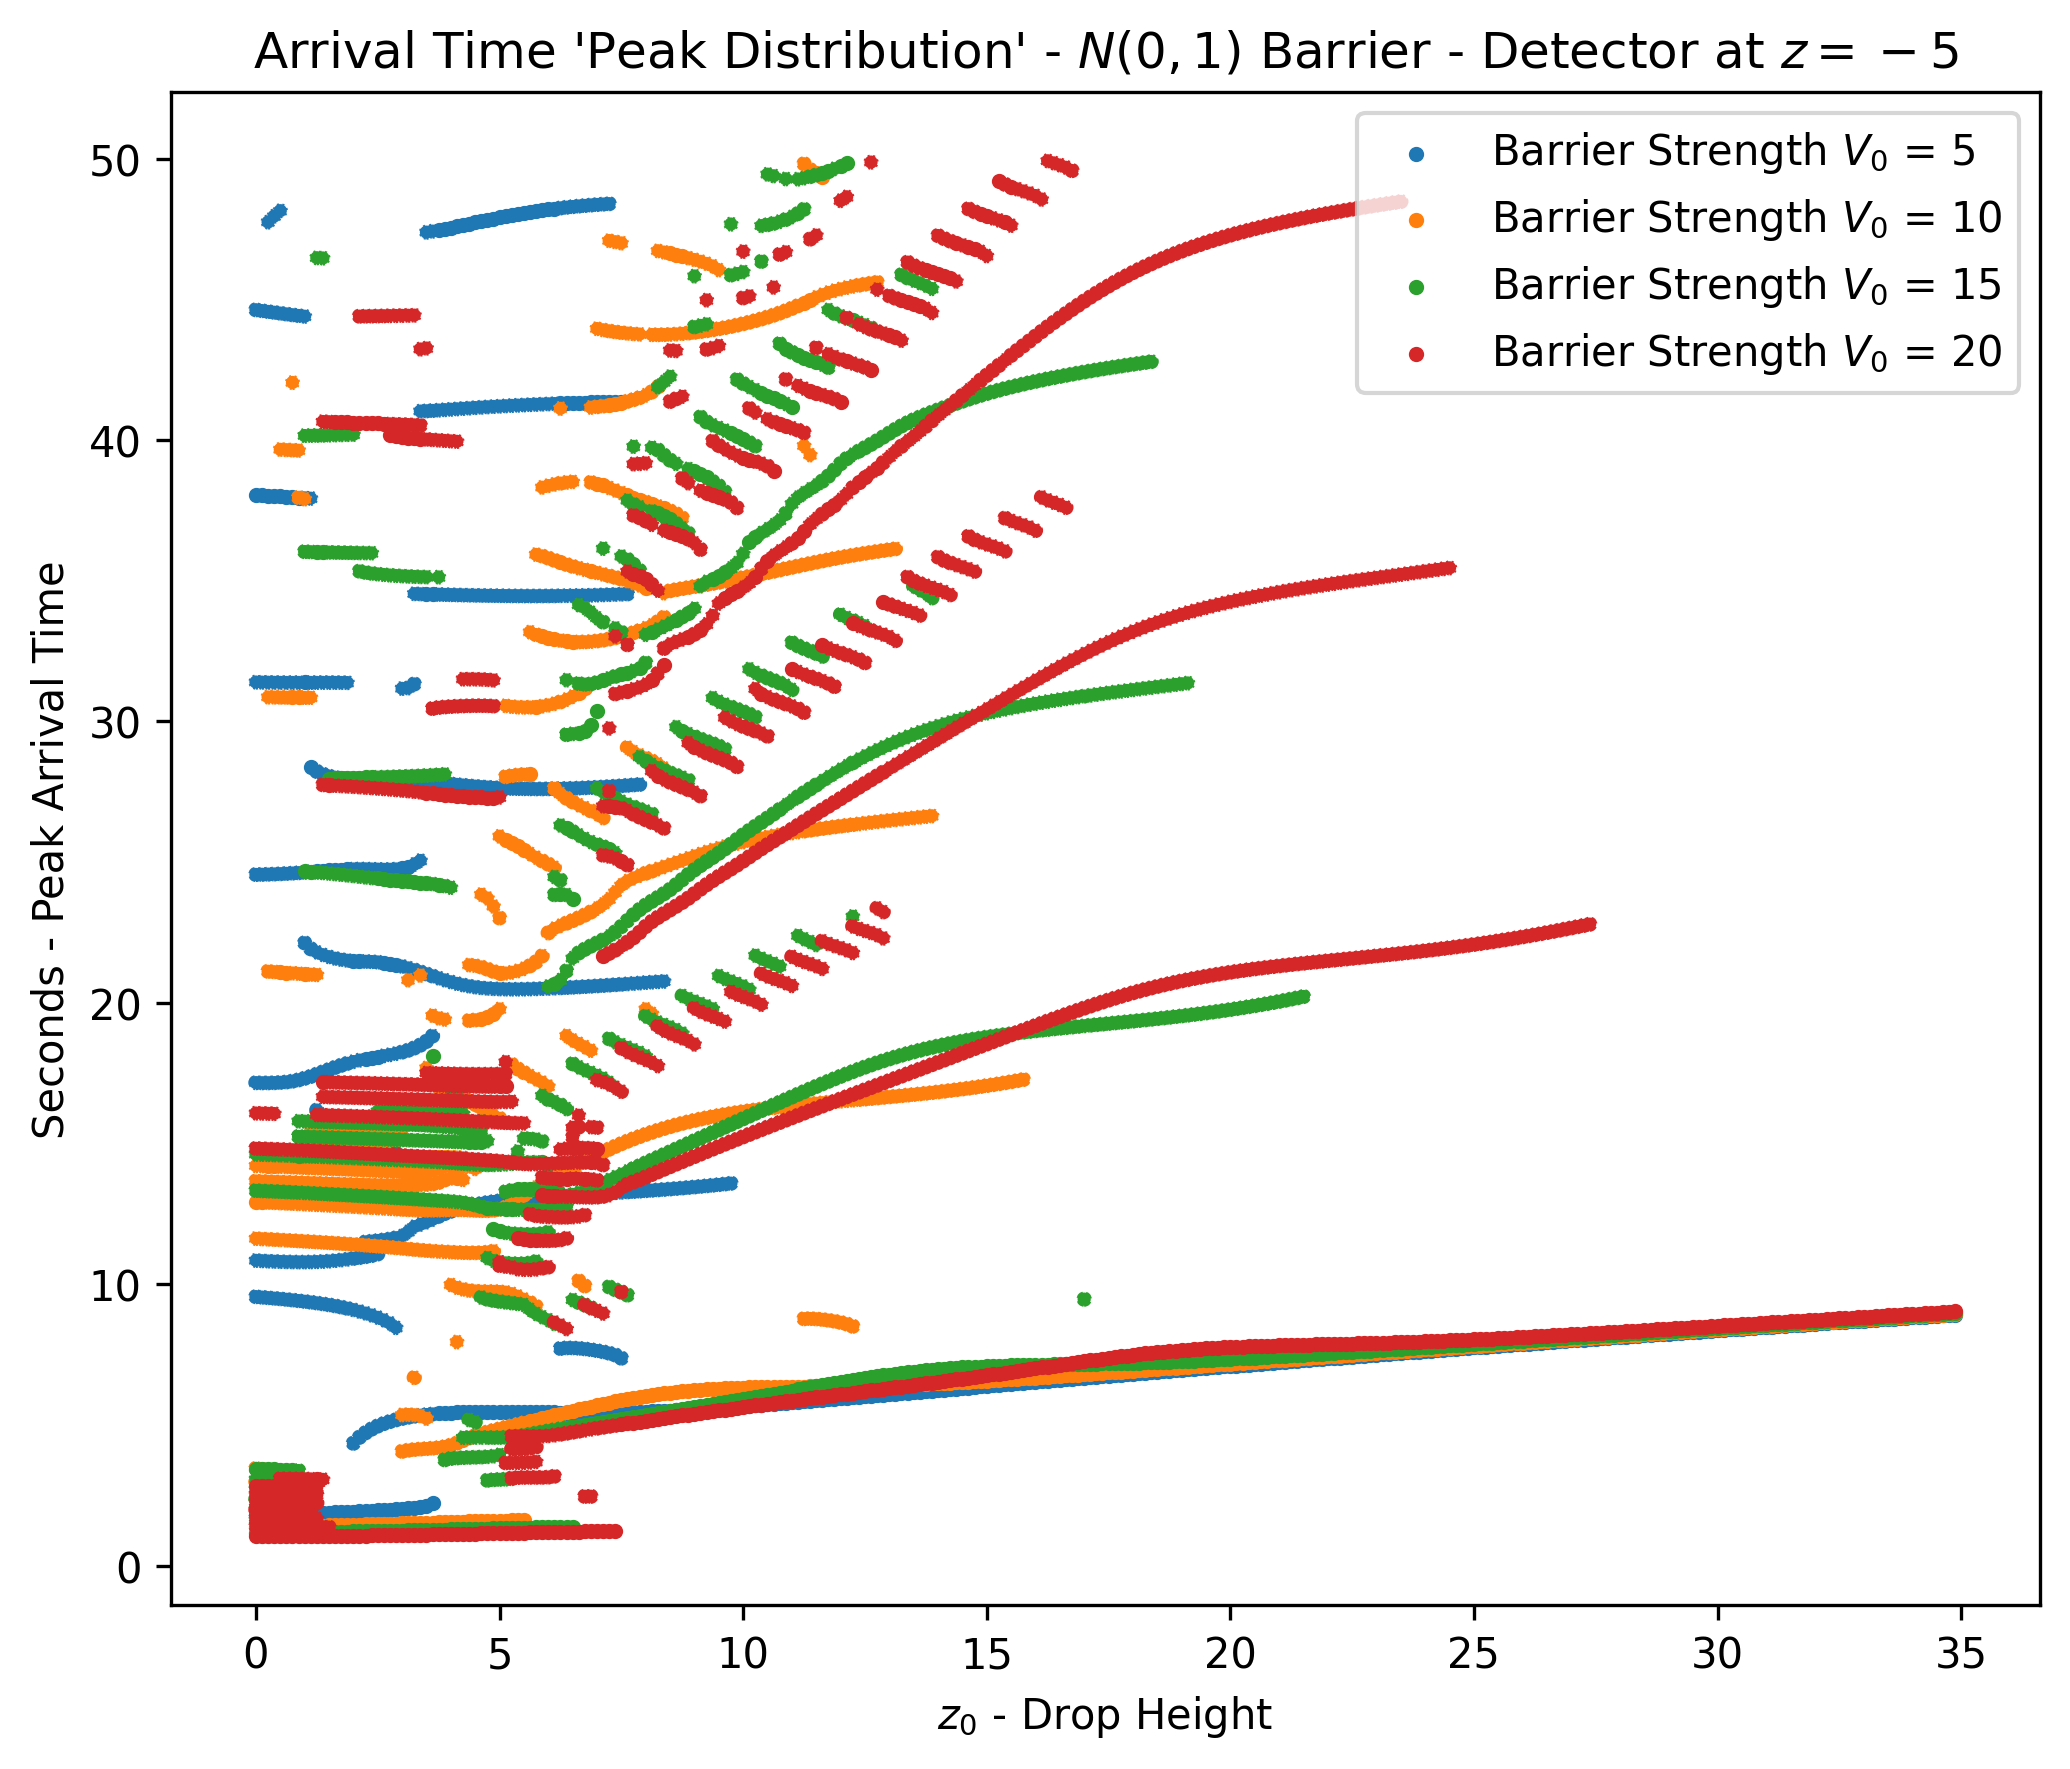

In [96]:
peaks = 10
j_results_donna = j_g_new

# Dictionary to store peak time values for all 7 peaks
peak_time_values = {i: {} for i in range(1, peaks)}  # 1 through 7 peaks

# go through each z0 result
for v0, j_for_v0_values in j_results_donna.items():
	# Initialize lists for each peak
	for peak_num in range(1, peaks):
		peak_time_values[peak_num][v0] = []

	# go through all j values for this slice
	for ii, j in enumerate(j_for_v0_values):
		# Find all 7 peaks
		for peak_num in range(1, peaks):
			peak_idx, peak_val = find_first_peak(j, peak_num - 1)  # peak_num - 1 because find_first_peak uses 0-based indexing
			
			if peak_idx is not None:
				peak_time_values[peak_num][v0].append([ii*0.125, peak_idx*dt])

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(7, 6))  # Slightly larger figure to accommodate more lines
fig.dpi = 300

# Get the default color cycle
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Define line styles for different peaks
line_styles = ['-', '--', ':', '-.', '--', ':', '-.']  # Different styles for each peak

# Plot each z0 value
for i, (v0, _) in enumerate(peak_time_values[1].items()):
	color = colors[i % len(colors)]  # Cycle through colors for different z0 values
	
	# Plot all X peaks for this z0
	for peak_num in range(1, peaks):
		
		label = f"Barrier Strength $V_0$ = {v0}" if peak_num == 1 else None

		if len(peak_time_values[peak_num][v0]) > 0:
			x, y = zip(*peak_time_values[peak_num][v0])
			ax.scatter(
				x, y,
				color=color,
				linestyle=line_styles[(peak_num - 1) % (len(line_styles)-1)],
				linewidths=0.5,
				s=10,  # <-- This makes the dots small. Try values like 5, 10, or 20.
				label=label
			)

ax.set_title("Arrival Time 'Peak Distribution' - $N(0,1)$ Barrier - Detector at $z=-5$")
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside to prevent overlap
ax.legend(loc='upper right')  # Move legend outside to prevent overlap
ax.set_xlabel("$z_0$ - Drop Height")
ax.set_ylabel("Seconds - Peak Arrival Time")
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

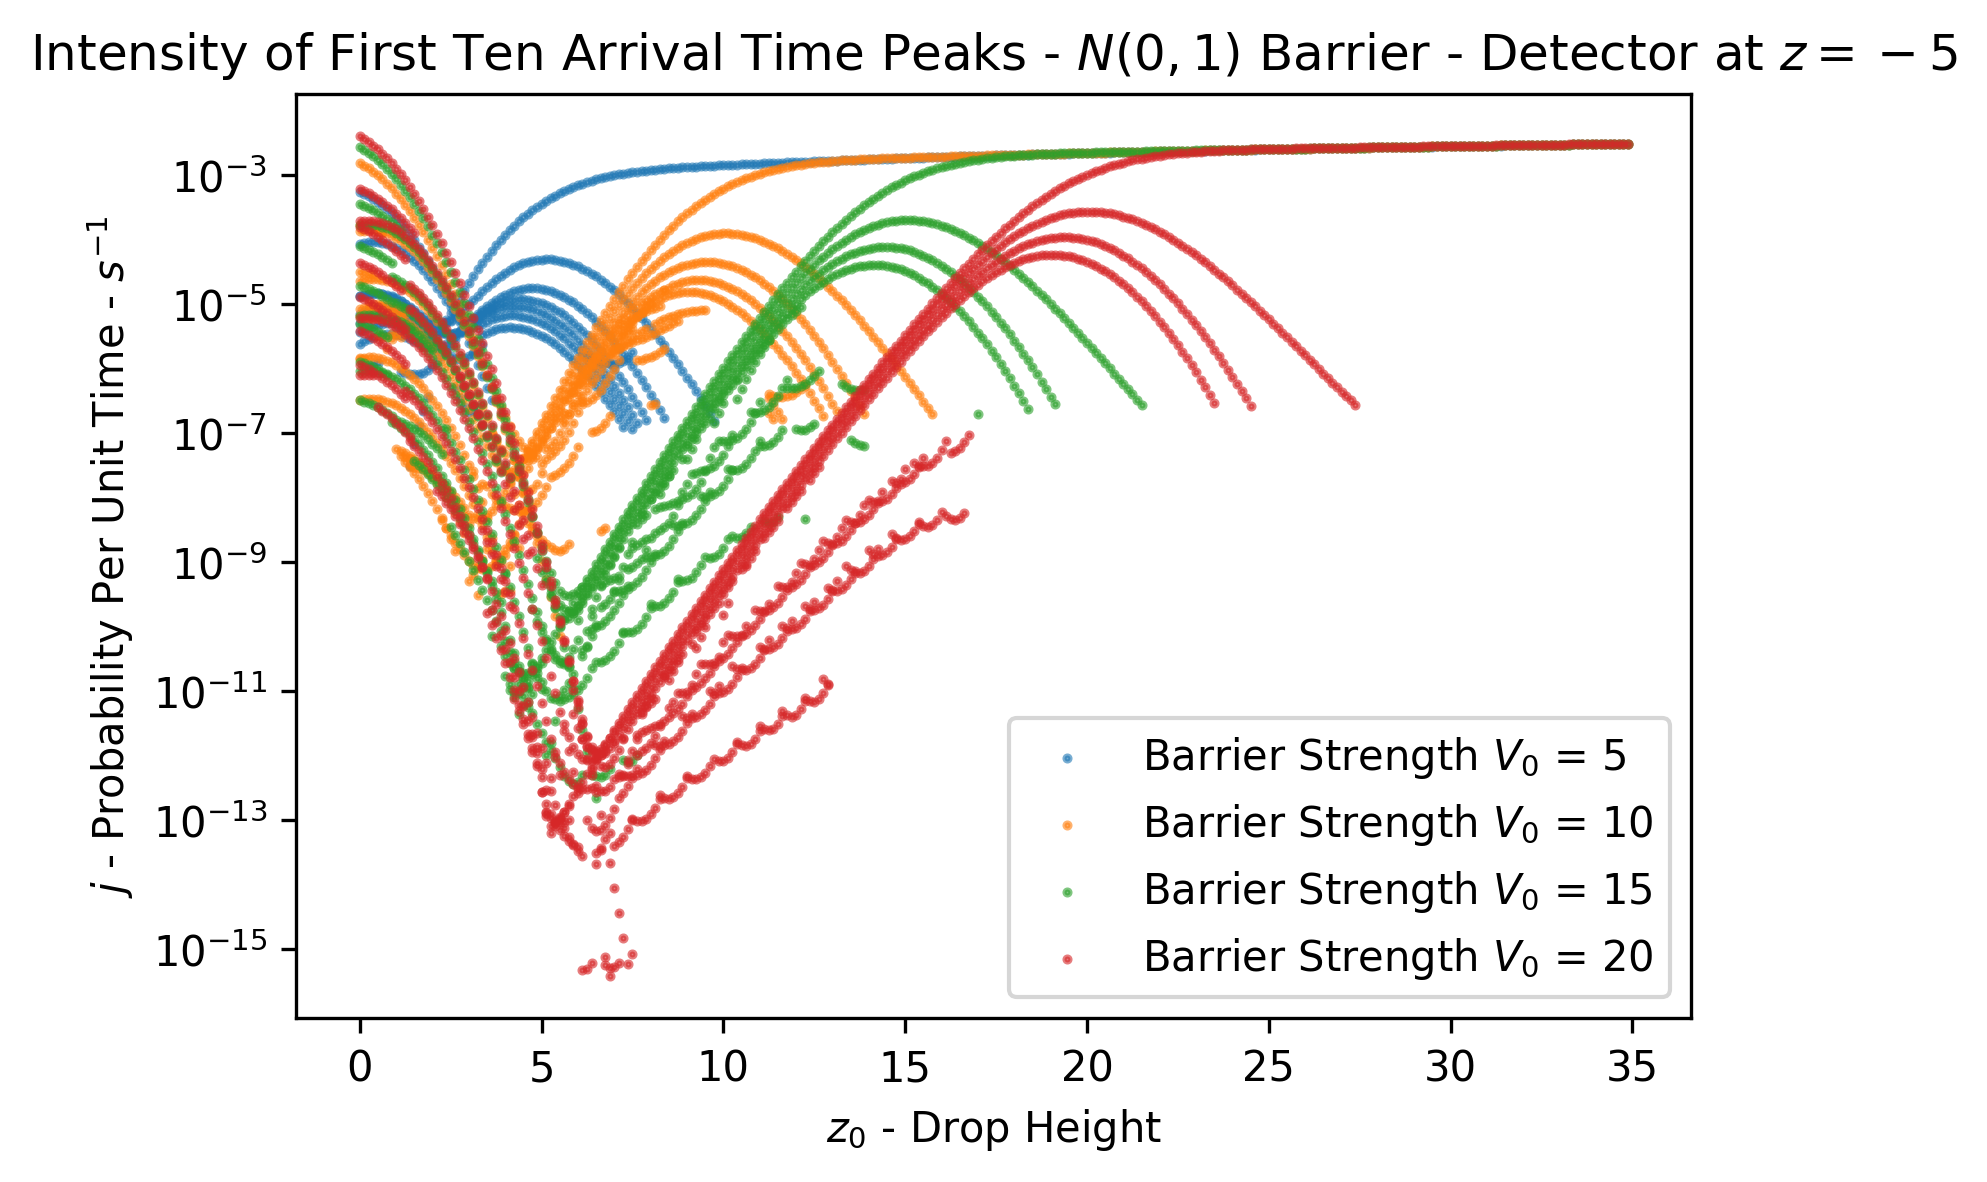

In [101]:
num_peaks = 10
peak_values = [{} for _ in range(num_peaks)]
j_results_donna = j_g_new

# Collect peak values for each z0 and each peak
for z0, j_for_v0_values in j_results_donna.items():
	for peak_dict in peak_values:
		peak_dict[z0] = []

	for ii, j in enumerate(j_for_v0_values):
		for peak_num in range(num_peaks):
			peak_idx, peak_val = find_first_peak(j, peak_num)
			peak_values[peak_num][z0].append([ii * 0.125, peak_val])

fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, z0 in enumerate(j_results_donna.keys()):
	
	# if z0 == 20:
	#     continue
	
	color = colors[i % len(colors)]
	for peak_num in range(num_peaks):
		x, y = zip(*peak_values[peak_num][z0])
		# Only label the first and second peaks
		label = None
		if peak_num == 0:
			label = f"Barrier Strength $V_0$ = {z0}"
		ax.scatter(x, y, color=color, s=2, label=label, alpha=0.6)
		

ax.set_title("Intensity of First Ten Arrival Time Peaks - $N(0,1)$ Barrier - Detector at $z=-5$")
ax.legend()
ax.set_xlabel("$z_0$ - Drop Height")
ax.set_ylabel("$j$ - Probability Per Unit Time - $s^{-1}$")
ax.set_yscale('log')
# ax.set_xlim(0, 15)
plt.show()

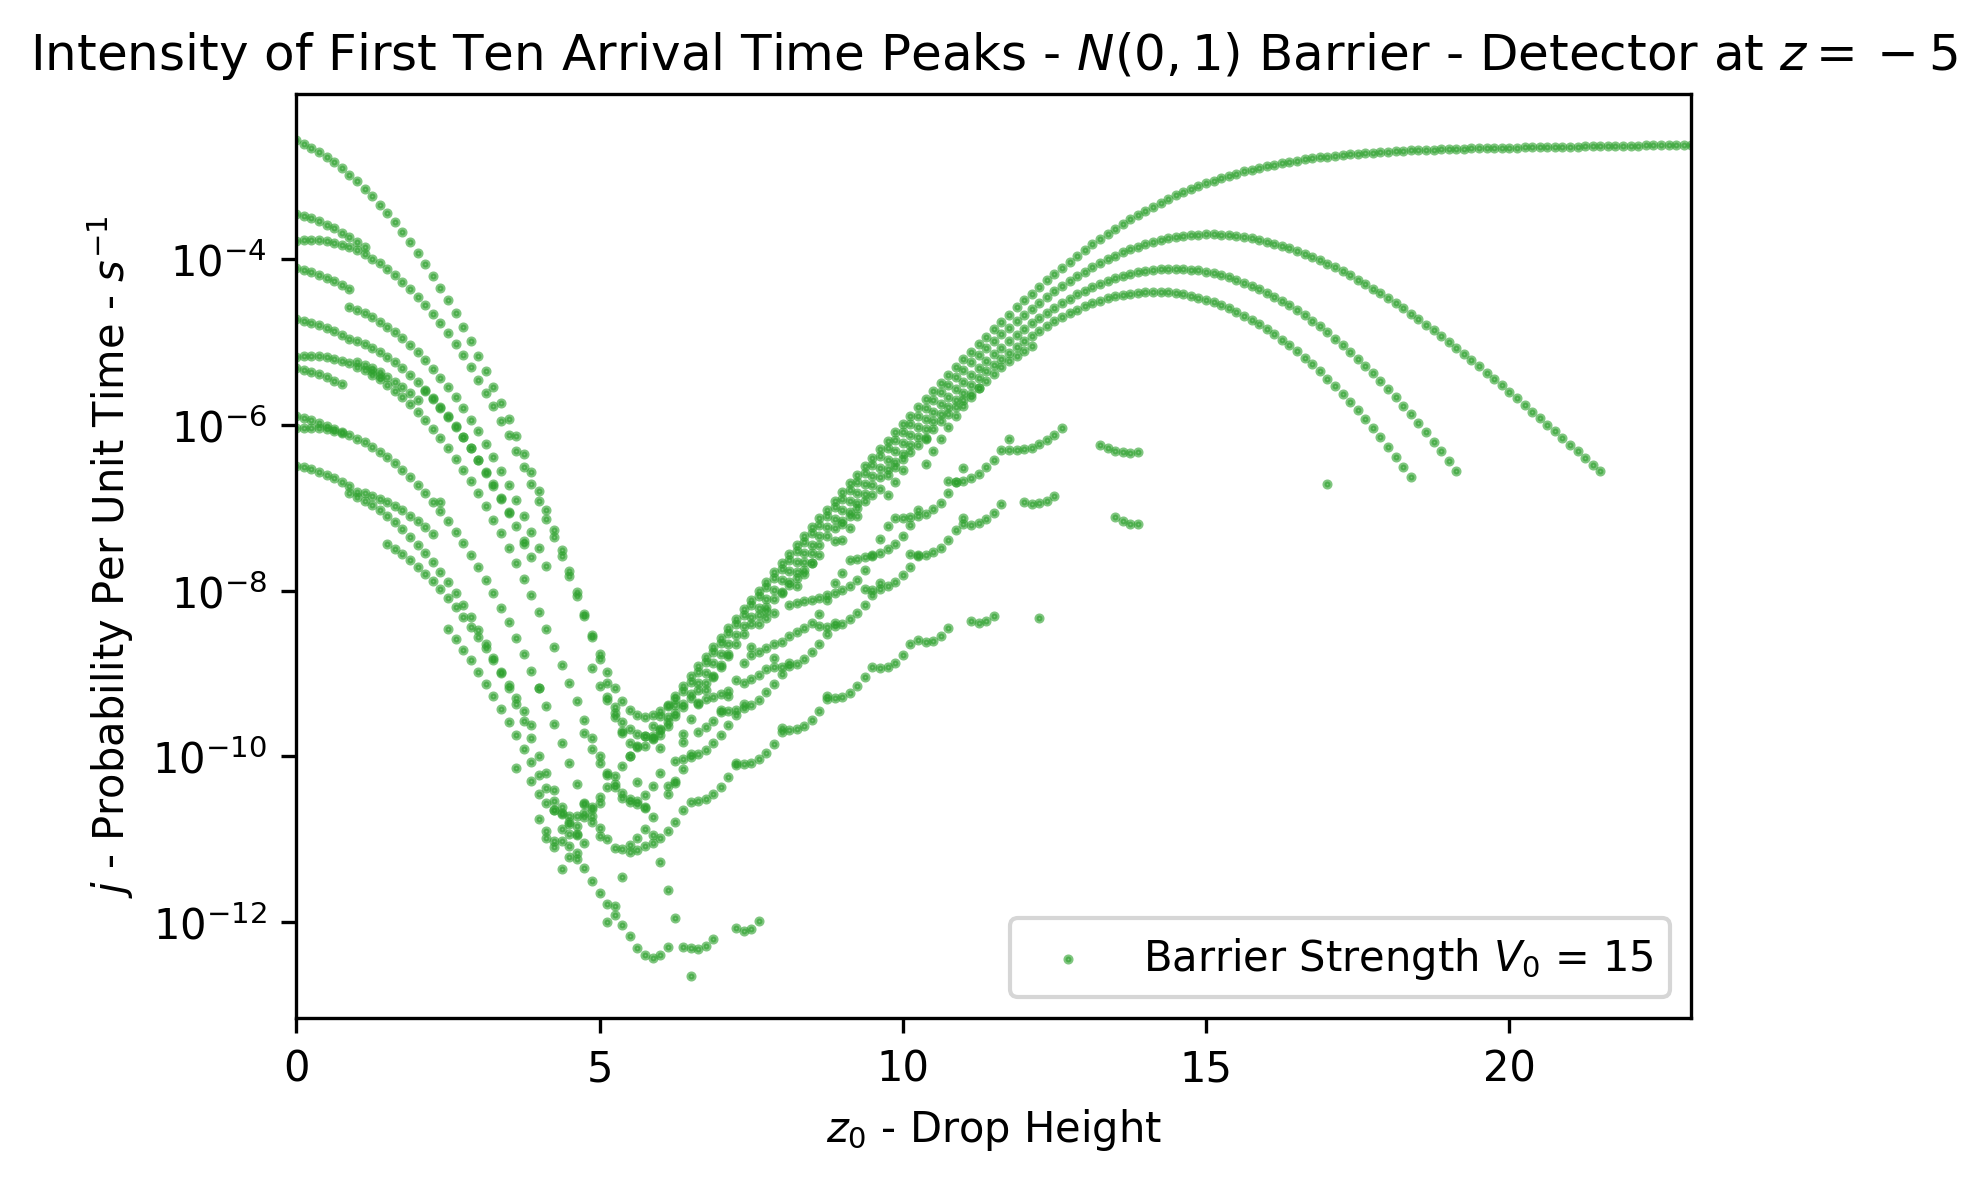

In [104]:
num_peaks = 10
peak_values = [{} for _ in range(num_peaks)]
j_results_donna = j_g_new

# Collect peak values for each z0 and each peak
for z0, j_for_v0_values in j_results_donna.items():
	for peak_dict in peak_values:
		peak_dict[z0] = []

	for ii, j in enumerate(j_for_v0_values):
		for peak_num in range(num_peaks):
			peak_idx, peak_val = find_first_peak(j, peak_num)
			peak_values[peak_num][z0].append([ii * 0.125, peak_val])

fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, z0 in enumerate(j_results_donna.keys()):
	
	if z0 != 15:
	    continue
	
	color = colors[i % len(colors)]
	for peak_num in range(num_peaks):
		x, y = zip(*peak_values[peak_num][z0])
		# Only label the first and second peaks
		label = None
		if peak_num == 0:
			label = f"Barrier Strength $V_0$ = {z0}"
		ax.scatter(x, y, color=color, s=2, label=label, alpha=0.6)
		

ax.set_title("Intensity of First Ten Arrival Time Peaks - $N(0,1)$ Barrier - Detector at $z=-5$")
ax.legend()
ax.set_xlabel("$z_0$ - Drop Height")
ax.set_ylabel("$j$ - Probability Per Unit Time - $s^{-1}$")
ax.set_yscale('log')
ax.set_xlim(0, 23)
plt.show()